Ahora veremos si hay outliers 

In [ ]:


numeric_cols = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard',
                'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']


for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

   
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]


    print(f"Columna: {col}")
    print(f"Número de outliers/anomalías: {len(outliers)}")
    print(f"Límite inferior: {lower_limit}")
    print(f"Límite superior: {upper_limit}")
    print("Valores de los outliers/anomalías:")
    print(outliers)
    print("\n")

plt.figure(figsize=(12, 8))
df[numeric_cols].boxplot()
plt.title('Boxplots de las columnas numéricas')
plt.xticks(rotation=90)
plt.show()


No podemos considerarlos outliers ya que el codigo solo marca los valores que se van del rango propuesto, pero no quiere decir que sean outliers, la que mas me llamo la atencion es la coluna crew_aboard pero chequie y la mayoria son aviones militares sonde todos sus pasajeros tabien son parte de la tripulacion por eso hay valores tan altos.

Ahora tokenizamos la columna summary para ver palabras claves que mas se repiten y ver si podemos usar alguna para segmentar los accidentes 

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict


summary_data = df['summary'].tolist()


stop_words = set(stopwords.words('english'))


word_frequencies = defaultdict(int)


for summary in summary_data:
   
    tokens = word_tokenize(summary)


    filtered_words = [word.lower() for word in tokens if word.isalpha(
    ) and word.lower() not in stop_words and len(word) > 4]

    
    for word in filtered_words:
        word_frequencies[word] += 1

sorted_word_frequencies = sorted(
    word_frequencies.items(), key=lambda x: x[1], reverse=True)


for word, frequency in sorted_word_frequencies:
    print(f"{word}: {frequency}")


crashed: 3232
aircraft: 2572
plane: 2212
flight: 1093
pilot: 1091
runway: 1015
engine: 977
approach: 961
failure: 839
airport: 766
landing: 761
altitude: 636
weather: 621
control: 578
taking: 578
conditions: 535
cargo: 530
takeoff: 528
ground: 525
struck: 512
mountain: 502
miles: 481
attempting: 475
route: 436
accident: 391
shortly: 359
right: 356
killed: 347
flying: 329
failed: 329
short: 311
error: 306
captain: 305
emergency: 290
terrain: 278
caused: 276
minutes: 273
power: 257
descent: 243
trees: 233
heavy: 233
cause: 221
visibility: 212
crash: 210
stalled: 208
helicopter: 203
airplane: 199
field: 196
flames: 195
broke: 194
engines: 189
found: 183
speed: 179
resulted: 176
pilots: 173
unknown: 168
system: 168
procedures: 165
maintain: 164
burned: 161
reported: 160
attempt: 159
causing: 157
aboard: 156
contributing: 156
attempted: 154
instrument: 154
visual: 152
water: 149
improper: 149
passenger: 147
caught: 145
final: 144
passengers: 144
night: 144
descended: 144
course: 137
collisi

Como podemos ver si hay 3 columnas que nos pueden servir para segmentar los accidentes y estas son  crashed failure weather. las usare para segmentar los accidentes.

Ahora creamos un mapa de calor para ver la correlacion entre variables numericas 

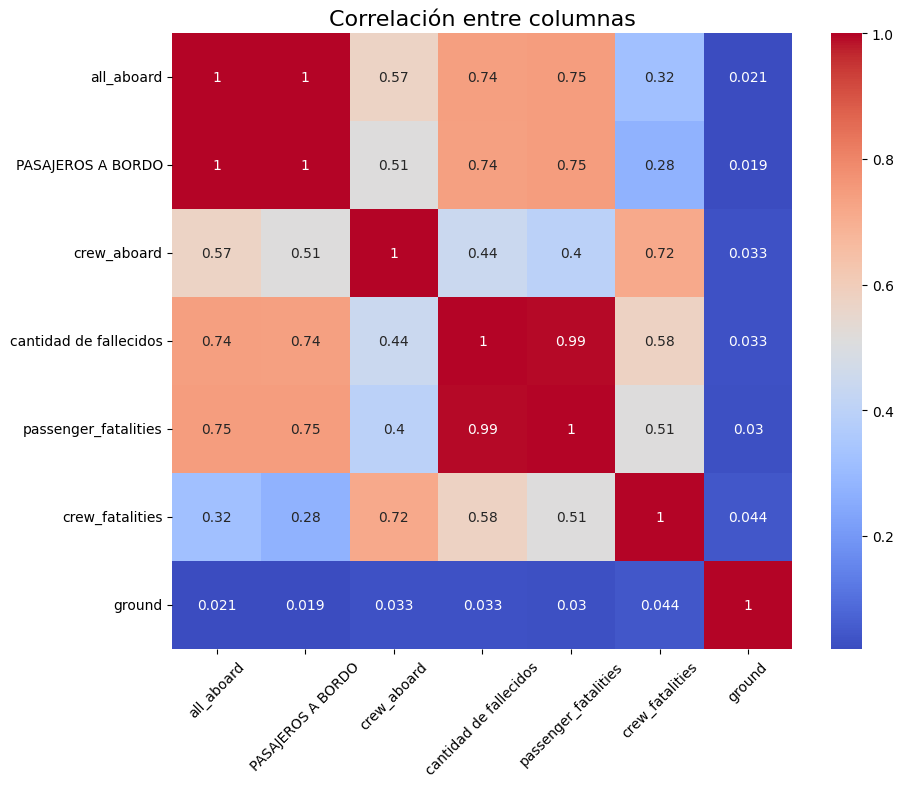

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('AccidentesAviones_norm1.csv')


columns = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
           'passenger_fatalities', 'crew_fatalities', 'ground']


subset = df[columns]


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')

heatmap.set_title('Correlación entre columnas', fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()


Ahora calculamos la correlacion de pearson para corroborar que las variables si estan relacionadas y no es puro azar 

In [11]:
import pandas as pd


df = pd.read_csv('AccidentesAviones_norm1.csv')

columns = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
           'passenger_fatalities', 'crew_fatalities', 'ground']


subset = df[columns]


correlation_matrix = subset.corr(method='pearson')

print(correlation_matrix)


                        all_aboard  PASAJEROS A BORDO  crew_aboard  \
all_aboard                1.000000           0.997525     0.571069   
PASAJEROS A BORDO         0.997525           1.000000     0.512712   
crew_aboard               0.571069           0.512712     1.000000   
cantidad de fallecidos    0.741989           0.738343     0.442549   
passenger_fatalities      0.746225           0.746713     0.396484   
crew_fatalities           0.321539           0.275362     0.716388   
ground                    0.020732           0.018921     0.032518   

                        cantidad de fallecidos  passenger_fatalities  \
all_aboard                            0.741989              0.746225   
PASAJEROS A BORDO                     0.738343              0.746713   
crew_aboard                           0.442549              0.396484   
cantidad de fallecidos                1.000000              0.993017   
passenger_fatalities                  0.993017              1.000000   
crew_fa

Como podemos ver la mayoria estan relacionadas entre si....

Veamos la distribucion de accidentes por año 

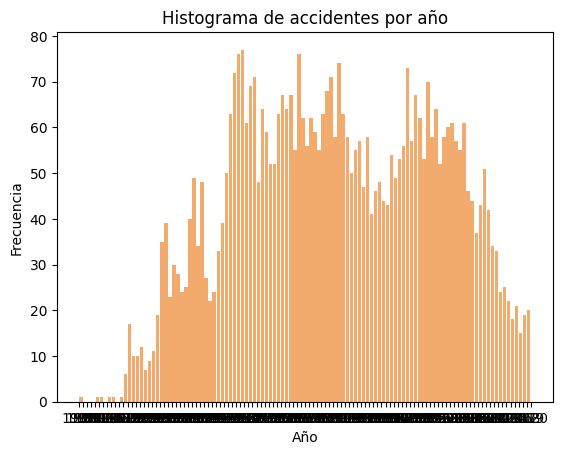

In [12]:
intervalos = range(df['Año_colision'].min(), df['Año_colision'].max())

plt.hist(x=df.Año_colision, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show()
